In [1]:
# %pip install pandas
# %pip install numpy
# %pip install sklearn
# %pip install matplotlib
# %pip install pyswarms
# %pip install plotly
# %pip install numba

In [2]:
from utils import GPR, mean_squared_error, visualize, generate_sample, aha

import numpy as np
from tqdm import tqdm
import plotly.express as px

In [3]:
target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)

n_train_data_points = 50
n_test_data_points = 10_000
n_dims = 2
lower_bound = -2.5, -1.5
upper_bound = +1.5, +2.5

In [4]:
X_train, y_train = generate_sample(n_train_data_points, n_dims, lower_bound, upper_bound, target_func, noise_scale=1)
X_test,  y_test  = generate_sample(n_test_data_points, n_dims, lower_bound, upper_bound, target_func)

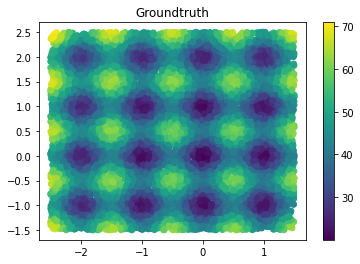

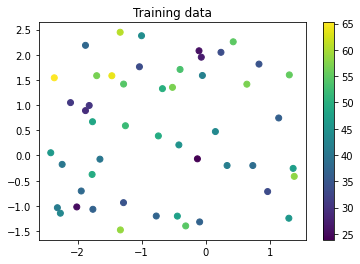

In [5]:
visualize(X_test, y_test, title='Groundtruth'), visualize(X_train, y_train, title='Training data');

In [6]:
from sklearn.gaussian_process.kernels import ConstantKernel, ExpSineSquared, RBF

kernel = ExpSineSquared(length_scale=-1.9124377, periodicity=2.59977543, length_scale_bounds="fixed", periodicity_bounds="fixed") + RBF(1.0) * ConstantKernel(1.0)
args = {
    'c1': 0.6, 
    'c2': 0.4, 
    'w': 0.3,
    'n_optim_steps': 100,
    'n_particles': 20,
    "kernel": kernel
}

gpr = GPR(**args)

In [7]:
gpr = gpr.fit(X_train, y_train)

2022-07-21 12:10:49,130 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.4, 'w': 0.3}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=222
2022-07-21 12:10:50,769 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 222.19364503063355, best pos: [-0.73070865  7.3930058 ]


<AxesSubplot:title={'center':'Cost History'}, xlabel='Iterations', ylabel='Cost'>

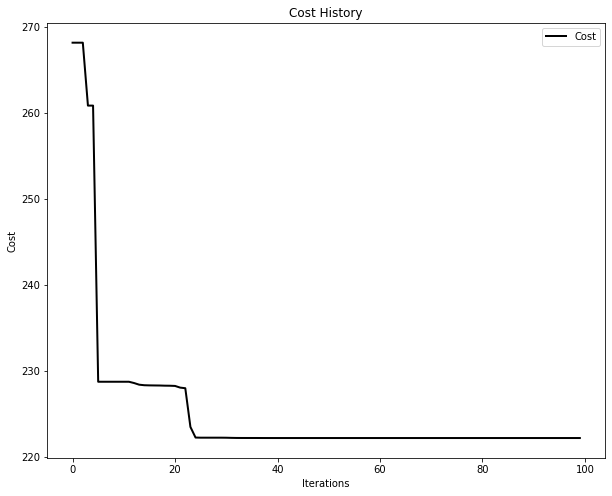

In [8]:
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
from pyswarms.utils.plotters.formatters import Mesher, Designer, Animator
plot_cost_history(cost_history=gpr.optimizer.cost_history)

In [9]:
gpr.model.kernel.theta

array([0., 0.])

c:\Users\tzehl\AppData\Local\Programs\Python\Python39\lib\site-packages\pyswarms\utils\plotters\plotters.py:222: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, zz, levels=mesher.levels)


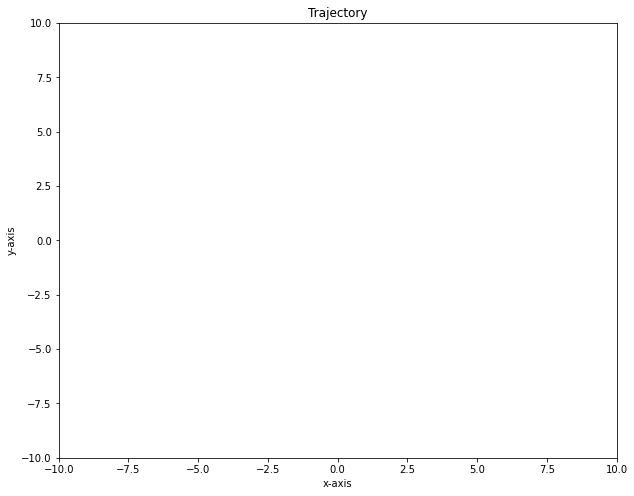

In [11]:
limits = [(-10, 10), (-10, 10)]
a = Animator(interval=50)
d = Designer(limits=limits)
m = Mesher(func=lambda thetas: np.array([-gpr.model.log_marginal_likelihood(theta) for theta in thetas]), limits=limits, delta=0.1)
animation = plot_contour(pos_history=gpr.optimizer.pos_history, mesher=m, designer=d, animator=a)

In [12]:
animation.save('mymovie1.mp4')

2022-07-21 12:26:36,228 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2022-07-21 12:26:36,229 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 720x576 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y mymovie1.mp4


In [ ]:
y_pred = gpr.predict(X_test)
mean_squared_error(y_test, y_pred)

1333.083550420864

In [ ]:
# # dauert m 40s
# gpr = gpr.hyper_optimize(X_train, y_train)
# y_pred = gpr.predict(X_test)
# mean_squared_error(y_test, y_pred)

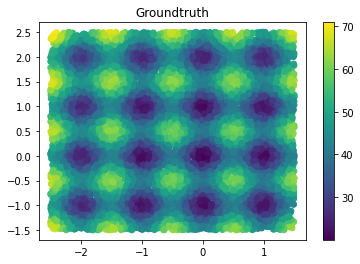

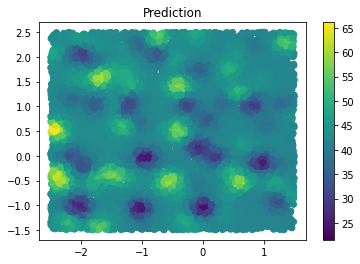

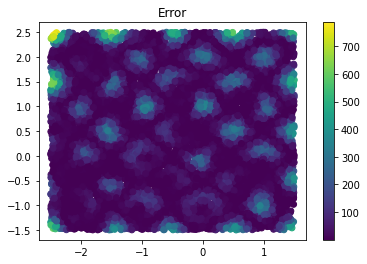

In [ ]:
visualize(X_test, y_test, title="Groundtruth")
visualize(X_test, y_pred, title="Prediction")
visualize(X_test, (y_test-y_pred)**2, title="Error");

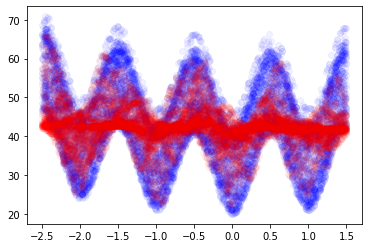

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test[0], target_func(X_test), label="Training data", color="blue", alpha=0.05)
plt.scatter(X_test[0], y_pred, label="Prediction", color="red", alpha=0.05);

In [ ]:
n_data_points = [50, 250, 500, 750, 1000, 2000, 5000]
errors = []
for n in tqdm(n_data_points):
    X_train, y_train = generate_sample(n, n_dims, lower_bound, upper_bound, target_func, noise_scale=0)
    gpr = GPR(**args)
    gpr = gpr.fit(X_train, y_train) 
    y_pred = gpr.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)
    
px.scatter(x=n_data_points, y=errors, title='Error vs. Number of Data Points', log_y=True, trendline="lowess")

  0%|          | 0/7 [00:00<?, ?it/s]2022-07-21 11:44:44,323 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.1, 'w': 0.5}


[[-11.51292546  11.51292546]
 [-11.51292546  11.51292546]
 [-11.51292546  11.51292546]]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.58e+3
2022-07-21 11:44:45,843 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3579.2651136008785, best pos: [-6.00320186  6.0181265   1.74841022]
 14%|█▍        | 1/7 [00:01<00:09,  1.55s/it]2022-07-21 11:44:45,878 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.1, 'w': 0.5}


[[-11.51292546  11.51292546]
 [-11.51292546  11.51292546]
 [-11.51292546  11.51292546]]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=8.53e+3
2022-07-21 11:44:53,763 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8534.506557207364, best pos: [10.12661934  1.36627211 -1.68790212]
 29%|██▊       | 2/7 [00:09<00:26,  5.36s/it]2022-07-21 11:44:53,894 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.1, 'w': 0.5}


[[-11.51292546  11.51292546]
 [-11.51292546  11.51292546]
 [-11.51292546  11.51292546]]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=9.52e+3
2022-07-21 11:45:25,931 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9522.359429233653, best pos: [ 8.75486978  1.30044994 -1.50332861]
 43%|████▎     | 3/7 [00:41<01:10, 17.66s/it]2022-07-21 11:45:26,197 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.1, 'w': 0.5}


[[-11.51292546  11.51292546]
 [-11.51292546  11.51292546]
 [-11.51292546  11.51292546]]


pyswarms.single.global_best:  28%|██▊       |28/100, best_cost=8.86e+3
 43%|████▎     | 3/7 [01:01<01:21, 20.48s/it]


KeyboardInterrupt: 

In [ ]:
noise_scales = [1, 5, 10, 30, 50, 70]
errors = []
for noise in tqdm(noise_scales):
    X_train, y_train = generate_sample(n_train_data_points, n_dims, lower_bound, upper_bound, target_func, noise_scale=noise)
    gpr = GPR(**args)
    gpr = gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)
    
px.scatter(x=noise_scales, y=errors, title='Error vs. Noise Scale', trendline="lowess")

100%|██████████| 6/6 [00:00<00:00,  6.47it/s]
